<div align="center">
    <h1>Entregable 3 del Laboratorio 1</h1>
</div>

**Asignatura:** Tópicos Especiales - Visión Artificial 

**Código:** 0756

**Profesor:** Edmanuel Cruz

**Estudiante:** Ricardo Cuan 8-941-913

<div align="center">
    <h1>Introducción</h1>
</div>

Para esta sección en su informe debe incluir la modificación de una imagen de su propiedad. Con dicha imagen se deben realizar las siguientes operaciones:

1. Aplique para una imagen de su elección (diferente a la utilizada en el ejemplo), un cropping del elemento u objeto principal de dicha imagen.

2. Utilizando el recorte anterior aplique una rotación de 217 utilizando como pivote un punto desplazado 30 píxeles del centro en el eje xb y para el eje yb utilice el centro del eje.

3. En otra copia del recorte realice una traslación de −25 píxeles en xb y 150 píxeles en el eje yb.

4. En este momento debe tener 4 archivos de imagen en memoria (original, crop, rotada y trasladada), calcule el histograma de color para cada una de estas imágenes.

5. Adjunte el resultado de cada modificación y el histograma generado para cada imagen.

<div align="center">
    <h1>Resultados</h1>
</div>

## Parte 0

In [1]:
# Importar las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar una iagen
image = cv2.imread('img/pikachu.jpg')

# Obtener las dimensiones de la imagen
height, width = image.shape[:2]

In [3]:
def show_with_matplotlib(img, title):
    """Mostrar las imágenes usando las capacidades de MatPlotLib"""
    
    # Convertir imagen BGR a RGB
    img_RGB = img[:, :, ::-1]
    
    # Mostrar la imagen con matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

## Parte 1

Aplique para una imagen de su elección (diferente a la utilizada en el ejemplo), un cropping del elemento u objeto principal de dicha imagen.

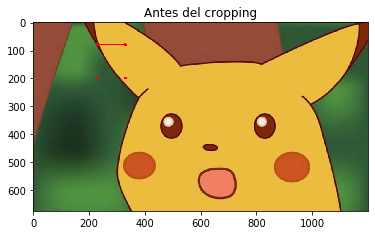

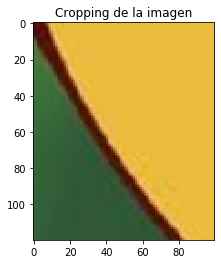

In [4]:
# Se crea en una copia la imagen para mostrar los puntos que forman parte del proceso
image_points = image.copy()

# Mostrar puntos y las líneas que conectan dichos puntos
cv2.circle(image_points, (230, 80), 5, (0, 0, 255), -1)
cv2.circle(image_points, (330, 80), 5, (0, 0, 255), -1)
cv2.circle(image_points, (230, 200), 5, (0, 0, 255), -1)
cv2.circle(image_points, (330, 200), 5, (0, 0, 255), -1)
cv2.line(image_points, (230, 80), (330, 80), (0, 0, 255))
cv2.line(image_points, (230, 200), (330, 200), (0, 0, 255))
cv2.line(image_points, (230, 80), (230, 200), (0, 0, 255))
cv2.line(image_points, (330, 200), (330, 80), (0, 0, 255))

# Mostrar la imagen
show_with_matplotlib(image_points, 'Antes del cropping')

# Para el recorte e utiliza la función slicing de numpy:
image_crop = image[80:200, 230:330]

# Mostrar la imagen
show_with_matplotlib(image_crop, 'Cropping de la imagen')

## Parte 2

Utilizando el recorte anterior aplique una rotación de 217 utilizando como pivote un punto desplazado 30 píxeles del centro en el eje xb y para el eje yb utilice el centro del eje.

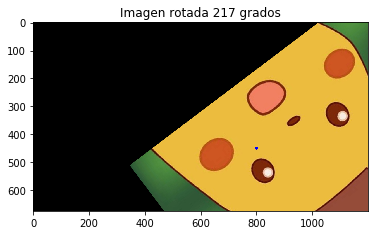

In [5]:
# En este caso cambiamos el centro de rotación
M = cv2.getRotationMatrix2D((width / 1.5, height / 1.5), 217, 1)
image_rotate = cv2.warpAffine(image, M, (width, height))

# Mostrar el centro de rotación y rotar 217 grados
cv2.circle(image_rotate, (round(width / 1.5), round(height / 1.5)),
5, (255, 0, 0), -1)

# Mostrar imagen
show_with_matplotlib(image_rotate, 'Imagen rotada 217 grados')

## Parte 3

En otra copia del recorte realice una traslación de −25 píxeles en xb y 150 píxeles en el eje yb.

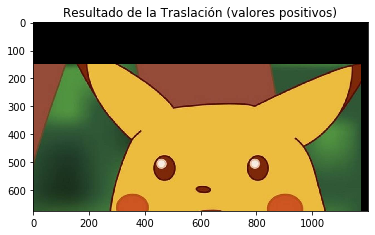

In [6]:
# Matriz de Transformación
M = np.float32([[1, 0, -25], [0, 1, 150]])

# Esta matriz se pasa a la función cv2.warpAffine():
image_trans = cv2.warpAffine(image, M, (width, height))

# Mostrar el resultado
show_with_matplotlib(image_trans, 'Resultado de la Traslación (valores positivos)')

## Parte 4

En este momento debe tener 4 archivos de imagen en memoria (original, crop, rotada y trasladada), calcule el histograma de color para cada una de estas imágenes.

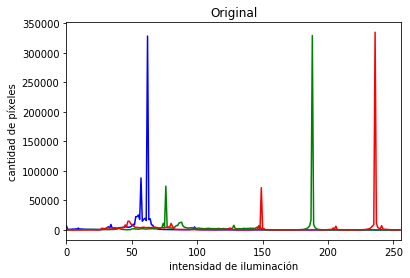

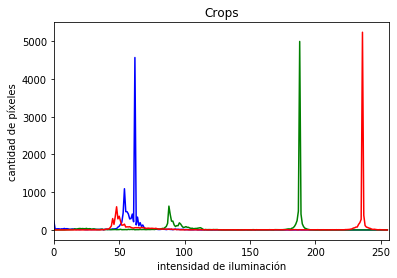

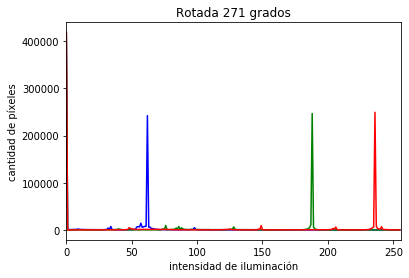

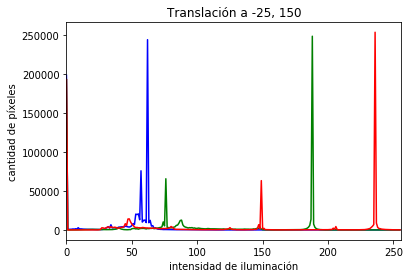

In [7]:
# Arreglo para guía de los colores
colors = ('b','g','r')

# Original
for i, c in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
    # Configuración de los Ejes

plt.title('Original')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de píxeles')

    # Mostrar el Histograma
plt.show()




# Crops
for i, c in enumerate(colors):
    hist = cv2.calcHist([image_crop], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
    # Configuración de los Ejes

plt.title('Crops')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de píxeles')

    # Mostrar el Histograma
plt.show()




# Rotada
for i, c in enumerate(colors):
    hist = cv2.calcHist([image_rotate], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
    # Configuración de los Ejes

plt.title('Rotada 271 grados')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de píxeles')

    # Mostrar el Histograma
plt.show()




# Translación
for i, c in enumerate(colors):
    hist = cv2.calcHist([image_trans], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])
    # Configuración de los Ejes

plt.title('Translación a -25, 150')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de píxeles')

    # Mostrar el Histograma
plt.show()